## ***1. Import Library's & Upload DataSet with labels***


In [1]:
#Import Library's
import os 
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Upload Dataset
paths = ['/kaggle/input/face-expression-recognition-dataset/images/train',
        '/kaggle/input/face-expression-recognition-dataset/images/validation']

In [3]:
#Labels 
labels = os.listdir(paths[0]) #Return a list of all the files and subdirectories within that directory.
labels

['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']

## ***2. Data Preprocessing and Label Encoding for Image Classification***


In [4]:
# Create a dictionary to encode labels
label_dict = {
    'angry': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'neutral': 4,
    'sad': 5,
    'surprise': 6
}

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through the paths of training and validation directories
for path in paths:
    for label in label_dict.keys():
        label_path = os.path.join(path, label)
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            #Read de image
            img = cv2.imread(img_path)
            images.append(img)
            labels.append(label_dict[label])

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Check the dimensions of the arrays
print("Dimensiones de las imágenes:", images.shape)
print("Dimensiones de las etiquetas:", labels.shape)

Dimensiones de las imágenes: (35887, 48, 48, 3)
Dimensiones de las etiquetas: (35887,)


## ***3. Data Splitting for Training, Testing, and Validation***


In [5]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Splitting the data into test and training sets
# This is used for final testing after training

# Split the data into training and testing sets
train_X,test_X,train_Y,test_Y = train_test_split(images,labels,test_size=0.2)
print('Testing data shape : ', test_X.shape, test_Y.shape)

# Splitting the data into validation and training sets
# This is used for testing during the training process

# Split the data into training and validation sets
train_X,val_X,train_Y,val_Y = train_test_split(train_X,train_Y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('validation data shape : ', val_X.shape, val_Y.shape)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Testing data shape :  (7178, 48, 48, 3) (7178,)
Training data shape :  (22967, 48, 48, 3) (22967,)
validation data shape :  (5742, 48, 48, 3) (5742,)


## ***4. Image Visualization and Label Display***

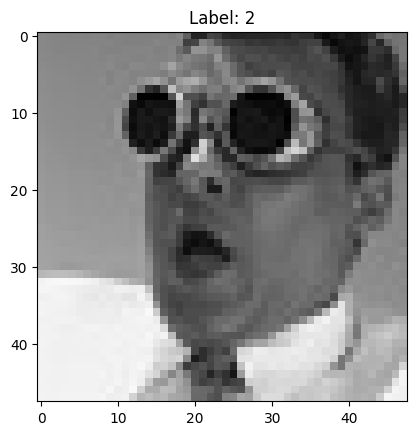

In [6]:
# Import the matplotlib.pyplot library as plt for plotting
import matplotlib.pyplot as plt

# Choose a specific image index to visualize (e.g., index 1)
indice_imagen = 0

# Display the image
# Use plt.imshow() to display the image located at the specified index (train_X[indice_imagen])
plt.imshow(train_X[indice_imagen])
# Set the title of the displayed image
# The title includes the label associated with the image if available (train_Y[indice_imagen])
plt.title(f'Label: {train_Y[indice_imagen]}')
# Show the image with the specified title
plt.show()

## ***5. Data Preparation and Dataset Information Display***


In [7]:
# Define the dimensions for image data
img_x = 48  # Width of the image
img_y = 48  # Height of the image
img_z = 3   # Number of color channels (e.g., 3 for RGB)
num_classes = 7  # Total number of classes or categories in the dataset

# Define the input shape for the model
input_shape = (img_x, img_y, img_z)

# Convert the data type of the image datasets to 'float32'
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
val_X = val_X.astype('float32')

# Print information about the shapes and sample counts of the datasets
print('train_X shape:', train_X.shape)  # Print the shape of the training data
print(train_X.shape[0], 'train samples')  # Print the number of training samples
print(val_X.shape[0], 'val samples')      # Print the number of validation samples
print(test_X.shape[0], 'test samples')    # Print the number of test samples


train_X shape: (22967, 48, 48, 3)
22967 train samples
5742 val samples
7178 test samples


## ***6. TensorFlow and Keras Setup for Deep Learning Mode***


In [8]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input, AveragePooling2D,Activation
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [9]:
# Create an EarlyStopping callback to prevent overfitting
custom_early_stopping = EarlyStopping(monitor="loss", patience=3)

## ***7. Convolutional Neural Network (CNN) Architecture for Image Classification***


In [24]:
# Create a Sequential model
model = tf.keras.Sequential([
    
    ## Feature Extraction
    # Add a 2D convolutional layer with 32 filters, a 3x3 kernel, 'same' padding, and the specified input shape
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), padding = 'same' ,activation='relu', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding = 'same' ,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(32, kernel_size=(3, 3),padding = 'same' ,activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    

    ## Classification
    # Flatten the feature maps into a one-dimensional vector
    tf.keras.layers.Flatten(),
    # Add a fully connected (dense) layer with 128 units
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # Add a final fully connected (dense) layer with the number of units equal to the number of classes (num_classes)
    # Use the softmax activation function for multi-class classification
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


# Output a summary of the model architecture
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 48, 48, 128)       3584      
                                                                 
 batch_normalization_10 (Bat  (None, 48, 48, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 24, 24, 128)      0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 24, 24, 128)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_11 (Bat  (None, 24, 24, 64)      

In [25]:
# Compile the model with specified loss, optimizer, and metrics
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [26]:
# Train the model using the training data
model_train = model.fit(
    train_X,           # Training data
    train_Y,           # Training labels
    batch_size=32,     # Batch size for training
    epochs=50,         # Number of training epochs
    verbose=1,         # Display training progress
    validation_data=(val_X, val_Y),  # Validation data to monitor model performance
    callbacks=[custom_early_stopping]  # Early stopping callback to prevent overfitting
)

# Evaluate and print the training accuracy and loss
train_score = model.evaluate(train_X, train_Y, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))

# Evaluate and print the validation accuracy and loss
val_score = model.evaluate(val_X, val_Y, verbose=0)
print('Validation loss: {}, Validation accuracy: {}'.format(val_score[0], val_score[1]))

Epoch 1/50


2023-10-01 02:55:55.506992: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/dropout_26/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


718/718 [==============================] - 10s 11ms/step - loss: 1.8849 - accuracy: 0.2435 - val_loss: 1.7486 - val_accuracy: 0.2874
Epoch 2/50
718/718 [==============================] - 7s 10ms/step - loss: 1.7562 - accuracy: 0.2833 - val_loss: 1.6594 - val_accuracy: 0.3192
Epoch 3/50
718/718 [==============================] - 7s 10ms/step - loss: 1.6956 - accuracy: 0.3134 - val_loss: 1.5873 - val_accuracy: 0.3798
Epoch 4/50
718/718 [==============================] - 7s 10ms/step - loss: 1.6398 - accuracy: 0.3412 - val_loss: 1.5496 - val_accuracy: 0.4079
Epoch 5/50
718/718 [==============================] - 7s 10ms/step - loss: 1.6058 - accuracy: 0.3623 - val_loss: 1.4710 - val_accuracy: 0.4424
Epoch 6/50
718/718 [==============================] - 7s 10ms/step - loss: 1.5733 - accuracy: 0.3790 - val_loss: 1.5495 - val_accuracy: 0.3901
Epoch 7/50
718/718 [==============================] - 7s 10ms/step - loss: 1.5360 - accuracy: 0.4002 - val_loss: 1.4223 - val_accuracy: 0.4542
Epoch 8/5

## ***8. Save H5 Model***

In [44]:
model.save("PruebaTecnica.h5")

## ***9. TEST H5 Model***

1/1 [==============================] - 0s 98ms/step
[[2.7976402e-11 0.0000000e+00 2.9678273e-14 1.0000000e+00 1.3200146e-12
  1.3418173e-16 1.6284579e-21]]
Predicted class: happy


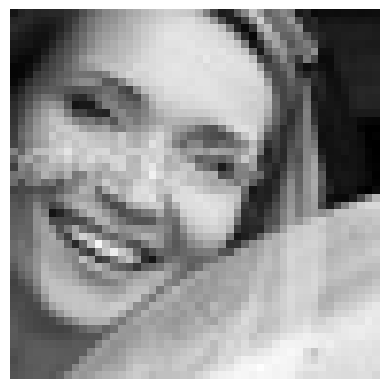

In [58]:
# Import necessary libraries and modules
from tensorflow.keras.models import load_model
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# Load a previously trained model
model = load_model("/kaggle/working/PruebaTecnica.h5")  # Replace with the actual path to your model

faces = []  # List to store processed faces

# Load an image from the directory
image_path = "/kaggle/input/face-expression-recognition-dataset/images/validation/happy/1058.jpg"

# Read, resize, and preprocess the image
face = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY)  # Read the image in grayscale
face = cv2.resize(face, (48, 48))  # Resize the image to the model's input size
face = cv2.cvtColor(face, cv2.COLOR_GRAY2RGB)  # Convert from grayscale to color
face = img_to_array(face)  # Convert the image to a NumPy array
face = np.expand_dims(face, axis=0)  # Add a batch dimension

faces.append(face)  # Append the processed face to the list

# Make predictions using the model
preds = model.predict(faces)  # This will give you the probabilities for each class

print(preds)

# Define class names based on your problem
class_names = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]


predicted_class_index = np.argmax(preds)  # Get the index of the class with the highest probability
# Assuming you have a list of class names (class_names), you can get the corresponding label
predicted_class = class_names[predicted_class_index]  # Replace 'class_names' with your actual list of class names

print("Predicted class:", predicted_class)

# Display the resulting image
plt.imshow(face[0].astype('uint8'))  # Show the image (convert back to uint8)
plt.axis('off')  # Hide the axis
plt.show()

## ***10. Confusion Matrix***

In [50]:
prediction_train = model.predict(train_X)
prediction_test = model.predict(test_X)

225/225 [==============================] - 1s 3ms/step


225/225 [==============================] - 1s 2ms/step
Confusion Matrix
[[ 378    7   53  127  229  179   17]
 [  21   34    7   15   11   17    3]
 [ 126    2  255  128  229  230   87]
 [  34    0   27 1515  130   72   27]
 [  40    1   41  166  823  166   10]
 [  89    4   73  145  371  509   11]
 [  25    0   93   58   68   24  501]]


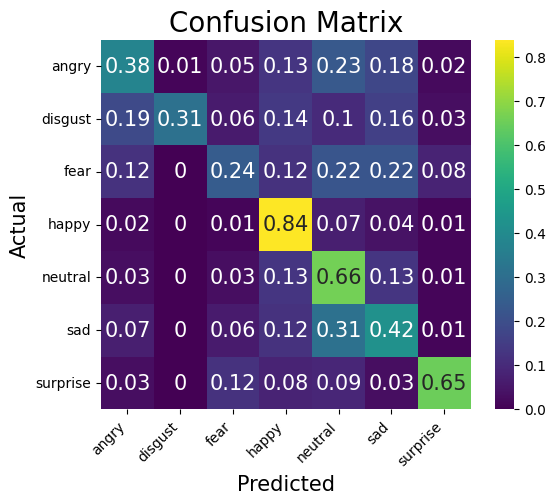

In [51]:
# Import necessary libraries and modules
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

# Convert test labels from one-hot encoding to single digits
y_test_arg = np.array(test_Y, dtype=int)

# Make predictions using the model and get the class with the highest probability
Y_pred = np.argmax(model.predict(test_X), axis=1)

# Print the confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

# Create a normalized confusion matrix
cm = confusion_matrix(y_test_arg, Y_pred)
cm = np.round(cm / np.sum(cm, axis=1).reshape(-1, 1), 2)

# Create a DataFrame for the confusion matrix with labels
labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
df_cm = pd.DataFrame(cm, labels, labels)

# Create a heatmap of the confusion matrix
ax = plt.axes()
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 15}, square=True, cbar=True, cmap="viridis", fmt='g')
ax.set_title('Confusion Matrix', fontsize=20)
ax.set_ylim(0, 7)  # Manually correct the cutoff issue in sns.heatmap found in matplotlib version 3.1.1
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("Actual", fontsize=15)
ax.invert_yaxis()  # Optional: Invert the y-axis to match convention
ax.set_xticklabels(labels, rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax.set_yticklabels(labels, rotation=0, ha='right')   # Rotate y-axis labels for better readability
plt.show()  # Show the heatmap

## ***11. Classification Report***

In [73]:
from sklearn.metrics import classification_report

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test_arg, Y_pred)

# Calcula el informe de clasificación que incluye precision, recall y f1-score por clase
class_report = classification_report(y_test_arg, Y_pred, target_names=class_names)

print("\nInforme de Clasificación:")
print(class_report)


Informe de Clasificación:
              precision    recall  f1-score   support

       angry       0.53      0.38      0.44       990
     disgust       0.71      0.31      0.44       108
        fear       0.46      0.24      0.32      1057
       happy       0.70      0.84      0.77      1805
         sad       0.44      0.66      0.53      1247
    surprise       0.43      0.42      0.42      1202
     neutral       0.76      0.65      0.70       769

    accuracy                           0.56      7178
   macro avg       0.58      0.50      0.52      7178
weighted avg       0.56      0.56      0.55      7178



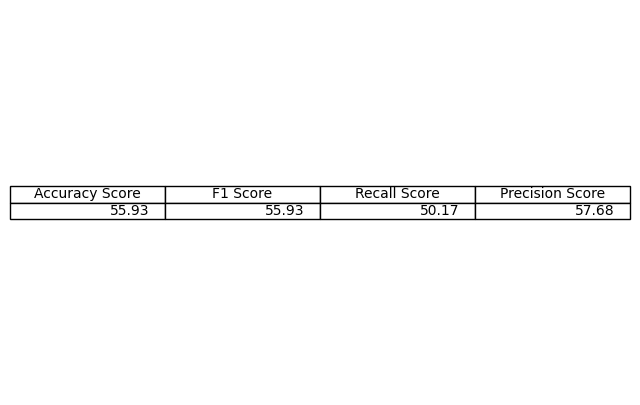

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_arg, Y_pred)
f1 = f1_score(y_test_arg, Y_pred, average='weighted')
recall = recall_score(y_test_arg, Y_pred, average='macro')
precision = precision_score(y_test_arg, Y_pred, average='macro')

metrics_dict = {'Accuracy Score': [round(accuracy*100,2)], 'F1 Score': [round(accuracy*100,2)], 'Recall Score': [round(recall*100,2)], 'Precision Score': [round(precision*100,2)]}
df_metrics = pd.DataFrame.from_dict(metrics_dict)

# guardar dataframe como png
fig, ax = plt.subplots(figsize=(8,5))
ax.axis('off')
ax.axis('tight')
ax.table(cellText=df_metrics.values,colLabels=df_metrics.columns,loc='center')